# MSA 2024 Phase 2 - Part 1

In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [3]:
#Importing data
Sales_data = pd.read_csv("store_sales.csv", encoding='latin1',delimiter=',',header='infer')
Sales_data["Order Date"] = pd.to_datetime(Sales_data["Order Date"])
Sales_data["Ship Date"] = pd.to_datetime(Sales_data["Ship Date"])
print("Below is the first 10 rows in the dataset")
print(Sales_data.head(n=10))
print("Below is the basic information about the data contained in each column")
print(Sales_data.info())
print("Below is the basic summary of the data")
print(Sales_data.describe())

#sorting the dataset by order date for better visibility
Sales_data.sort_values(by='Order Date', inplace = True) 

Below is the first 10 rows in the dataset
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
3       6  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
4      11  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
5      24  US-2017-156909 2017-07-16 2017-07-18    Second Class    SF-20065   
6      25  CA-2015-106320 2015-09-25 2015-09-30  Standard Class    EB-13870   
7      28  US-2015-150630 2015-09-17 2015-09-21  Standard Class    TB-21520   
8      30  US-2015-150630 2015-09-17 2015-09-21  Standard Class    TB-21520   
9      37  CA-2016-117590 2016-12-08 2016-12-10     First Class    GH-14485   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute

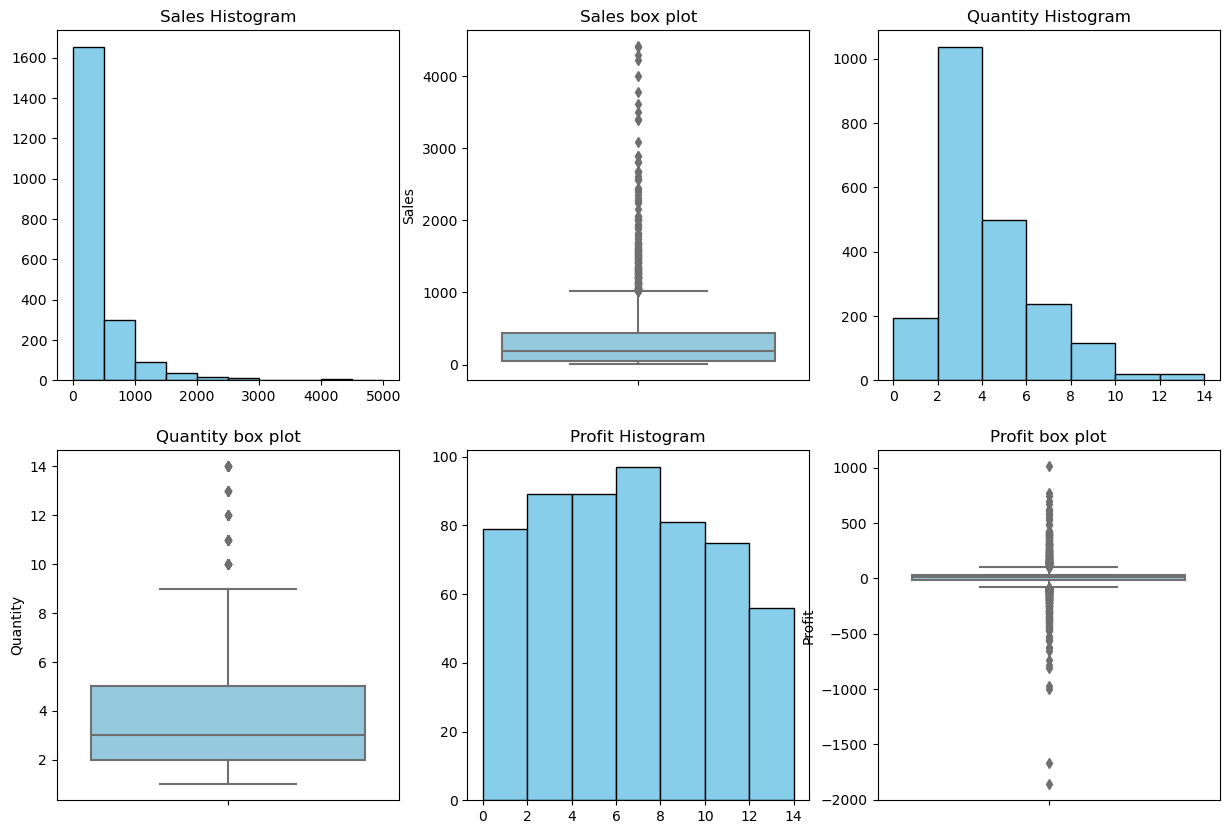

In [4]:
# Visualizing numeric columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10)) #creates the frame to fill the plots in

# Histogram of sales 
axes[0, 0].hist(Sales_data['Sales'], bins=(0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000), color='skyblue', edgecolor='black')
axes[0, 0].set_title('Sales Histogram')

# Box plot of sales
sns.boxplot(y=Sales_data['Sales'], color='skyblue', ax=axes[0, 1])
plt.ylabel('Sales')
axes[0, 1].set_title('Sales box plot')

# Histogram of Quantity 
axes[0, 2].hist(Sales_data['Quantity'], bins=(0,2,4,6,8,10,12,14), color='skyblue', edgecolor='black')
axes[0, 2].set_title('Quantity Histogram')

# Box plot of Quantity
sns.boxplot(y=Sales_data['Quantity'], color='skyblue', ax=axes[1, 0])
plt.ylabel('Quantity')
axes[1,0].set_title('Quantity box plot')

# Histogram of Profit 
axes[1, 1].hist(Sales_data['Profit'], bins=(0,2,4,6,8,10,12,14), color='skyblue', edgecolor='black')
axes[1, 1].set_title('Profit Histogram')

# Box plot of Profit
sns.boxplot(y=Sales_data['Profit'], color='skyblue', ax=axes[1, 2])
axes[1,2].set_title('Profit box plot')

plt.show()


## 2. Clean 

In [15]:
missing_data = Sales_data.isnull().sum().to_frame()
missing_data


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


Based on the above result we can see that there are no missing data. Therefore we have a complete data set. However we can see from the Histogram and Box plots that here are many outliers. An important response variable we aim to look at is Sales which seems to be heavily right skewed. Sales have a minimum value of 1.892 as seen in the summary output. This makes sense because usually we don't expect negative values for sales. 

In [5]:
Sales_data.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
print("Unique Categories: ", len(Sales_data['Category'].unique()))
print("Unique Sub- Categories: ", len(Sales_data['Sub-Category'].unique()))
print("Unique Regions: ", len(Sales_data['Region'].unique()))
print("Unique Ship Mode: ",len(Sales_data['Ship Mode'].unique()))
print("Unique States: ", len(Sales_data['State'].unique()))
print("Unique Cities: ",len(Sales_data['City'].unique())) 
print("Unique Countries: ",len(Sales_data['Country'].unique()))
print("Unique Segments: ",len(Sales_data['Segment'].unique()))


Unique Categories:  1
Unique Sub- Categories:  4
Unique Regions:  4
Unique Ship Mode:  4
Unique States:  48
Unique Cities:  371
Unique Countries:  1
Unique Segments:  3


Category and Country have 1 unique value therefore they're dropped because they don't add information. City contains a large number of unique values which means that it's not suitable for one-hot encoding. Hence the variables to be one-hot encoded are Sub-Category, Regions, Ship Mode, State, Segment.

In [21]:
columns_to_keep = ['Sub-Category', 'Region', 'State', 'Ship Mode', 'Sales', 'Quantity', 'Discount', 'Profit', 'Segment', 'Order Date']
Reduced_Sales_data = Sales_data[columns_to_keep]

# Apply one-hot encoding to relevant columns
categorical_columns = ['Sub-Category', 'Region', 'State', 'Ship Mode', 'Segment']
Sales_data_encoded = pd.get_dummies(Reduced_Sales_data, columns=categorical_columns, drop_first=False) # can also drop_first = True however since the number of new vectors is relatively low we can keep them for visualisation
Sales_data_encoded.head()

,Sales,Quantity,Discount,Profit,Order Date,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables,Region_Central,...,State_West Virginia,State_Wisconsin,State_Wyoming,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office
1577,2573.820,9,0.0,746.4078,2014-01-06,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1626,76.728,3,0.6,-53.7096,2014-01-07,False,False,True,False,True,...,False,False,False,False,False,False,True,True,False,False
181,51.940,1,0.0,21.2954,2014-01-10,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
150,9.940,2,0.0,3.0814,2014-01-11,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
631,545.940,6,0.0,87.3504,2014-01-13,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [22]:
# Sum or aggregate numeric features by Order Date
numeric_aggregation = Sales_data_encoded.groupby('Order Date').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean',
    'Profit': 'sum'
}).reset_index()

# Sum one-hot encoded variables by Order Date
one_hot_aggregation = Sales_data_encoded.groupby('Order Date').sum().reset_index()
one_hot_aggregation.drop(columns=['Sales', 'Quantity','Discount','Profit'], inplace=True)
# Ensure the date columns are aligned correctly
aggregated_df = pd.merge(numeric_aggregation, one_hot_aggregation, on='Order Date', how='left')
aggregated_df.tail()


,Order Date,Sales,Quantity,Discount,Profit,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables,Region_Central,...,State_West Virginia,State_Wisconsin,State_Wyoming,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office
884,2017-12-24,1393.4940,14,0.100000,222.9092,0,3,2,0,0,...,0,0,0,0,0,0,5,2,1,2
885,2017-12-25,832.4540,14,0.160000,-7.0763,1,1,2,1,0,...,0,0,0,1,0,1,3,4,1,0
886,2017-12-28,551.2568,17,0.336667,-49.6680,1,2,3,0,4,...,0,0,0,1,0,0,5,1,5,0
887,2017-12-29,2330.7180,26,0.033333,492.6236,0,4,2,0,0,...,0,0,0,0,0,3,3,5,1,0
888,2017-12-30,323.1360,4,0.200000,12.1176,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


Looking at the first 5 rows we can see that some dates are skipped. Perhaps no orders were made on those dates. I have aggregated the data further to be monthly data.

In [23]:
aggregated_df.set_index('Order Date', inplace=True) # must set the order date as the index for it to be aggregated correctly

In [24]:
# Downsample to monthly frequency, summing the sales for each month

# Resample the data to monthly frequency, however Discount is a ratio so it should be the mean instead of sum

monthly_resampled_df = aggregated_df.resample('M').agg({
    
    'Discount': 'mean',
    
    # One-hot encoded columns should be summed
    **{col: 'sum' for col in aggregated_df.columns if col not in [ 'Discount']}
})

monthly_resampled_df

,Discount,Sales,Quantity,Profit,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables,Region_Central,Region_East,...,State_West Virginia,State_Wisconsin,State_Wyoming,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2014-01-31,0.201923,6242.5250,70,805.4665,5,3,11,1,4,3,...,0,0,0,5,0,3,12,14,3,3
2014-02-28,0.160000,1839.6580,23,120.6917,0,2,4,1,4,0,...,0,0,0,1,1,2,3,5,1,1
2014-03-31,0.203088,14573.9560,131,-1128.6550,3,12,10,8,7,7,...,0,0,0,4,1,4,24,16,9,8
2014-04-30,0.113095,7944.8370,81,554.3801,1,7,11,7,4,6,...,0,0,0,2,1,4,19,9,8,9
2014-05-31,0.269792,6912.7870,97,-349.8776,2,9,9,4,9,7,...,0,1,0,3,2,5,14,15,9,0
2014-06-30,0.170351,13206.1256,122,596.3153,3,8,11,8,8,8,...,0,0,0,2,0,6,22,21,6,3
2014-07-31,0.176481,10821.0510,114,374.2467,2,13,12,6,5,7,...,0,0,0,4,2,3,24,15,12,6
2014-08-31,0.147917,7320.3465,107,663.4717,2,5,12,5,3,4,...,0,0,0,4,0,5,15,15,8,1
2014-09-30,0.149097,23816.4808,208,1858.5976,5,15,28,8,14,24,...,0,0,0,11,3,11,31,31,13,12


In [25]:
monthly_resampled_df.shape

(48, 67)

After aggregating the data, checking the shape of the data shows that we now have monthly data for years 2014 to 2017 with no skipped month in between which makes it suitable for timeseries analysis. 

## 3. Visualise data

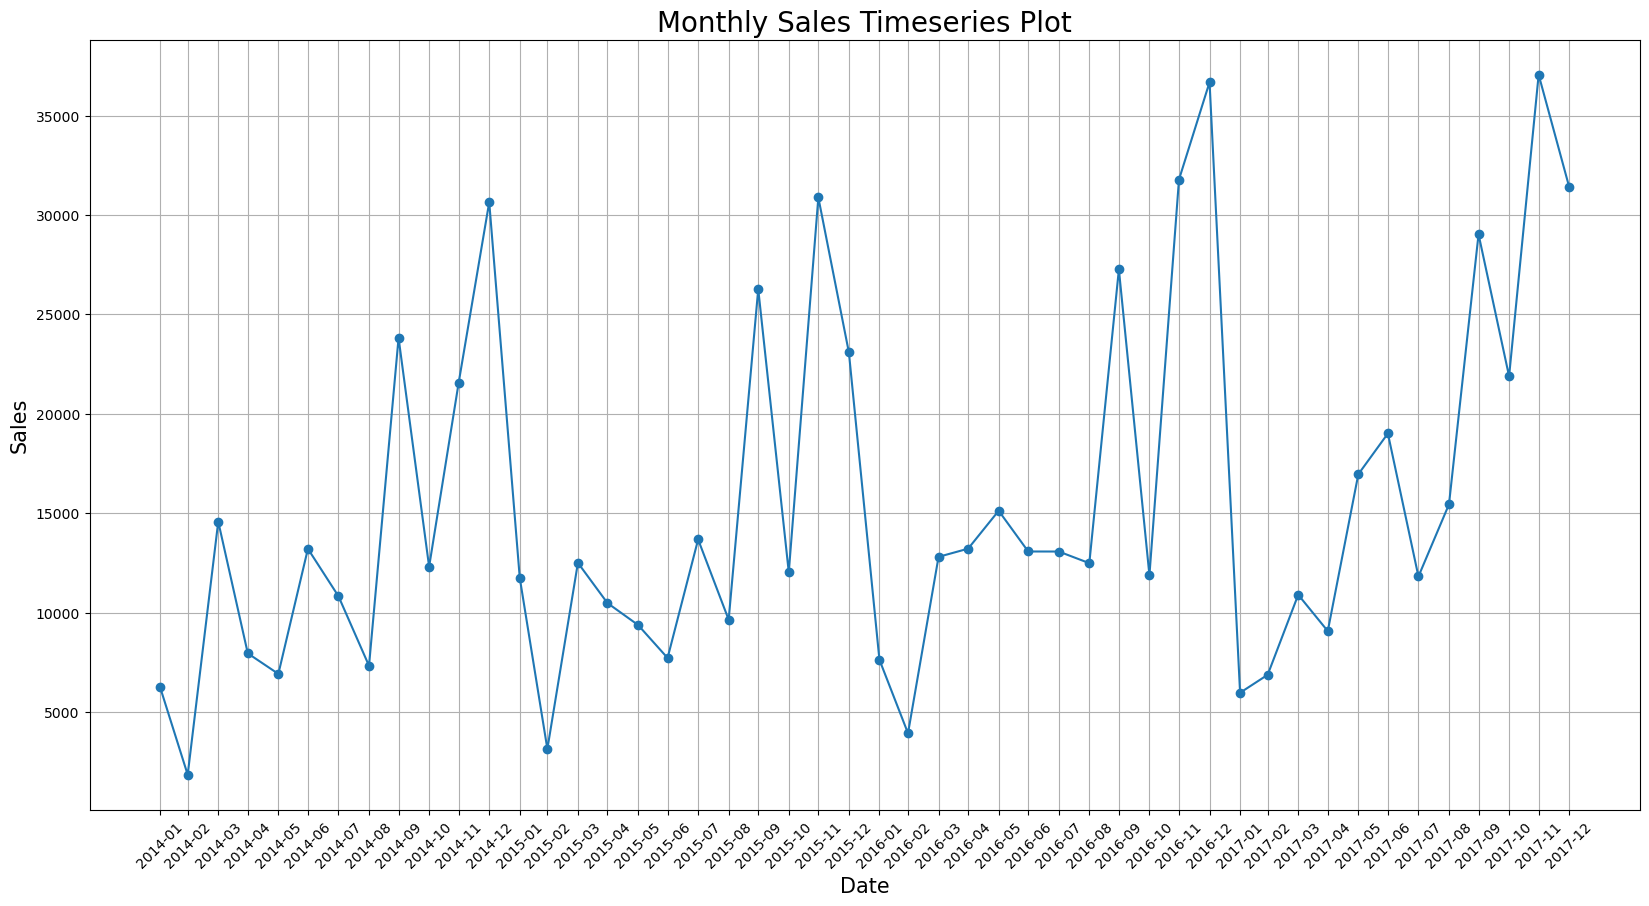

In [26]:
# Plotting the line graph of sales by date
monthly_resampled_df = monthly_resampled_df.reset_index() #reset the index to gain access to the order date column
plt.figure(figsize=(20, 10))
plt.plot(monthly_resampled_df["Order Date"], monthly_resampled_df["Sales"], marker='o', linestyle='-')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.title("Monthly Sales Timeseries Plot", fontsize=20)
plt.xticks(monthly_resampled_df["Order Date"], [x.strftime('%Y-%m') for x in monthly_resampled_df["Order Date"]], rotation=45)
plt.grid(True)
plt.show()

In [13]:
# Plot pairplot
monthly_resampled_df.columns

Index(['Order Date', 'Discount', 'Sales', 'Quantity', 'Profit',
       'Sub-Category_Bookcases', 'Sub-Category_Chairs',
       'Sub-Category_Furnishings', 'Sub-Category_Tables', 'Region_Central',
       'Region_East', 'Region_South', 'Region_West', 'State_Alabama',
       'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado',
       'State_Connecticut', 'State_Delaware', 'State_District of Columbia',
       'State_Florida', 'State_Georgia', 'State_Idaho', 'State_Illinois',
       'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky',
       'State_Louisiana', 'State_Maine', 'State_Maryland',
       'State_Massachusetts', 'State_Michigan', 'State_Minnesota',
       'State_Mississippi', 'State_Missouri', 'State_Montana',
       'State_Nebraska', 'State_Nevada', 'State_New Hampshire',
       'State_New Jersey', 'State_New Mexico', 'State_New York',
       'State_North Carolina', 'State_Ohio', 'State_Oklahoma', 'State_Oregon',
       'State_Pennsylvania', 'State

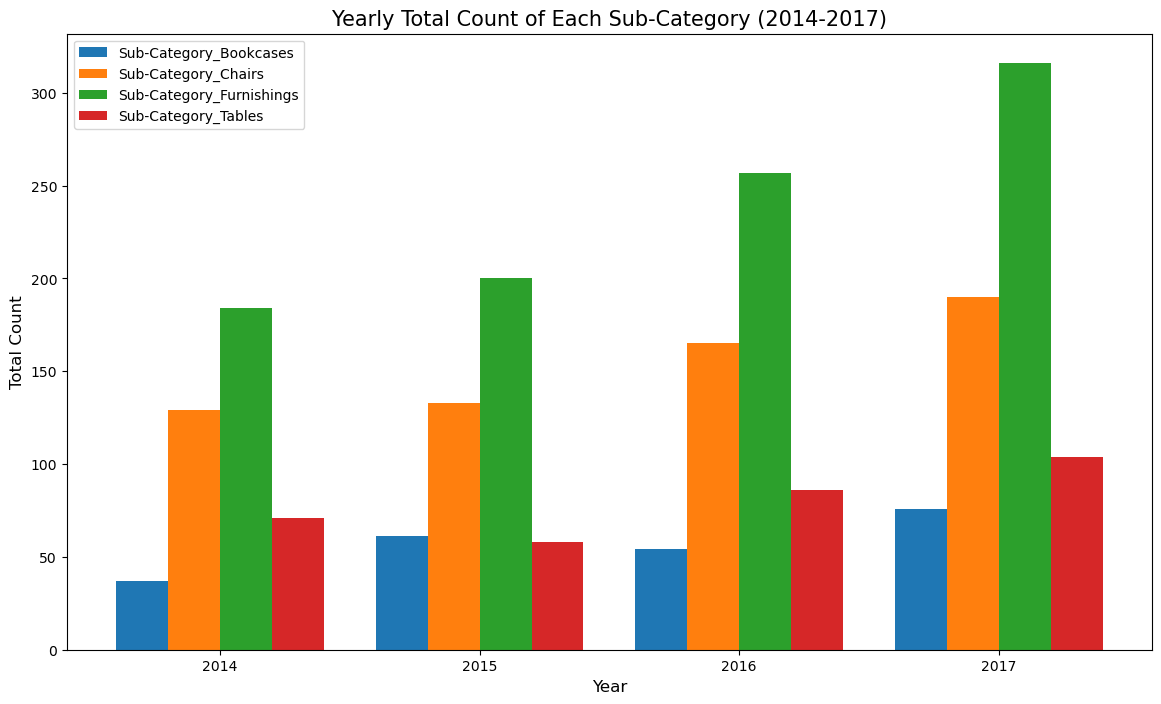

In [27]:
# Extract year from 'Order Date'
monthly_resampled_df['Year'] = monthly_resampled_df['Order Date'].dt.year
# List of sub-category columns
sub_category_columns = ['Sub-Category_Bookcases', 'Sub-Category_Chairs', 'Sub-Category_Furnishings', 'Sub-Category_Tables']
#Group by year and sum the sales and sub-category counts
yearly_aggregated = monthly_resampled_df.groupby('Year').agg({
    'Sales': 'sum',
    'Sub-Category_Bookcases': 'sum',
    'Sub-Category_Chairs': 'sum',
    'Sub-Category_Furnishings': 'sum',
    'Sub-Category_Tables': 'sum'
}).reset_index()

# Plotting the bar graph
years = yearly_aggregated['Year']
bar_width = 0.2  # Width of each bar

# Generate positions for each group of bars
bar_positions = [years + bar_width * i for i in range(len(sub_category_columns))]

plt.figure(figsize=(14, 8))

# Plot each sub-category
for i, col in enumerate(sub_category_columns):
    plt.bar(bar_positions[i], yearly_aggregated[col], width=bar_width, label=col)

# Adjust x-axis labels to be in the middle of the grouped bars
mid_positions = [year + (len(sub_category_columns) - 1) * bar_width / 2 for year in years]
plt.xticks(mid_positions, years)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.title('Yearly Total Count of Each Sub-Category (2014-2017)', fontsize=15)
plt.legend()
plt.show()

In [ ]:
monthly_resampled_df.set_index('Order Date', inplace=True)

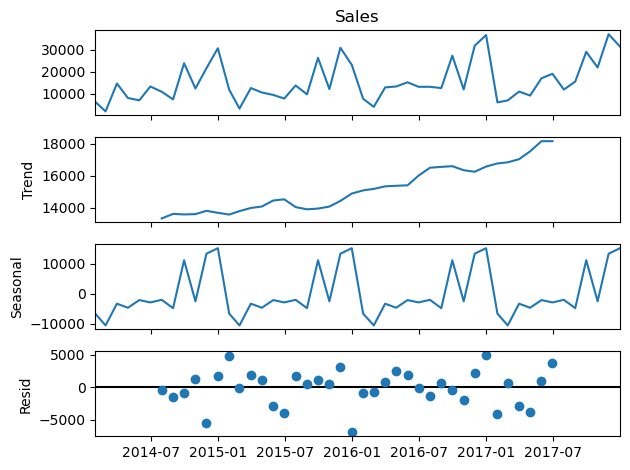

In [31]:

from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series

result = seasonal_decompose(monthly_resampled_df['Sales'], model='additive')
# Plot decomposition
result.plot()
plt.show()

In [35]:
# Extract residuals
residuals = result.resid
print(residuals)
# Identify outliers in the residuals
threshold = 3
outliers = residuals[abs(residuals) > threshold * residuals.std()]
print(outliers)

Order Date
2014-01-31            NaN
2014-02-28            NaN
2014-03-31            NaN
2014-04-30            NaN
2014-05-31            NaN
2014-06-30            NaN
2014-07-31    -470.626799
2014-08-31   -1481.116791
2014-09-30    -903.879569
2014-10-31    1245.623259
2014-11-30   -5555.340745
2014-12-31    1811.705566
2015-01-31    4804.583212
2015-02-28     -89.740566
2015-03-31    1839.217203
2015-04-30    1076.640302
2015-05-31   -2952.019862
2015-06-30   -3907.207347
2015-07-31    1672.902509
2015-08-31     548.878976
2015-09-30    1186.415073
2015-10-31     494.210034
2015-11-30    3141.485538
2015-12-31   -6956.369442
2016-01-31    -828.420997
2016-02-29    -692.166024
2016-03-31     786.102491
2016-04-30    2514.570894
2016-05-31    1839.803167
2016-06-30     -34.704134
2016-07-31   -1400.702058
2016-08-31     733.811467
2016-09-30    -480.961852
2016-10-31   -1938.259641
2016-11-30    2215.428859
2016-12-31    4946.237528
2017-01-31   -4174.588563
2017-02-28     583.480242
2

C:\Users\filmo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\filmo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\filmo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -348.952
Date:                            Fri, 05 Jul 2024   AIC                            707.904
Time:                                    21:40:21   BIC                            715.681
Sample:                                01-31-2014   HQIC                           710.589
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4363      0.172      2.529      0.011       0.098       0.774
ma.L1         -0.8722      0.143   

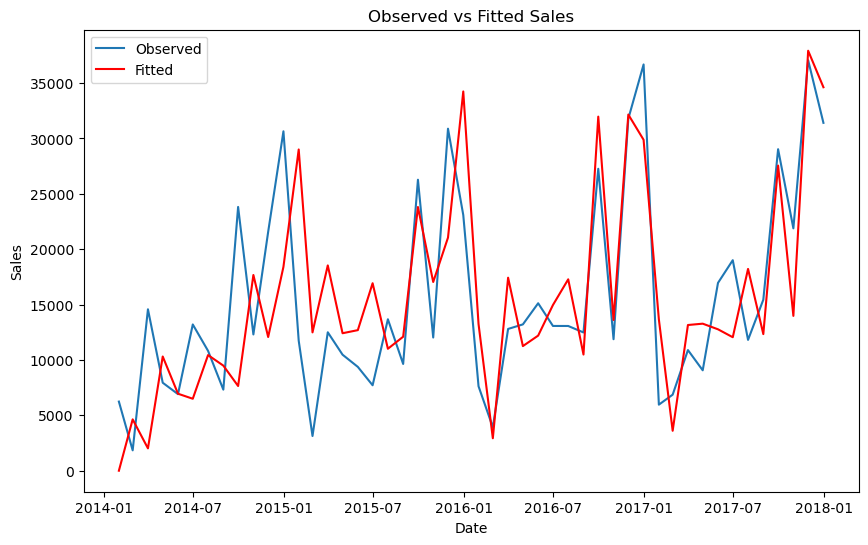

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
model = SARIMAX(monthly_resampled_df['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Print model summary
print(results.summary())

# Plot the fitted values
plt.figure(figsize=(10, 6))
plt.plot(monthly_resampled_df['Sales'], label='Observed')
plt.plot(results.fittedvalues, label='Fitted', color='red')
plt.title('Observed vs Fitted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


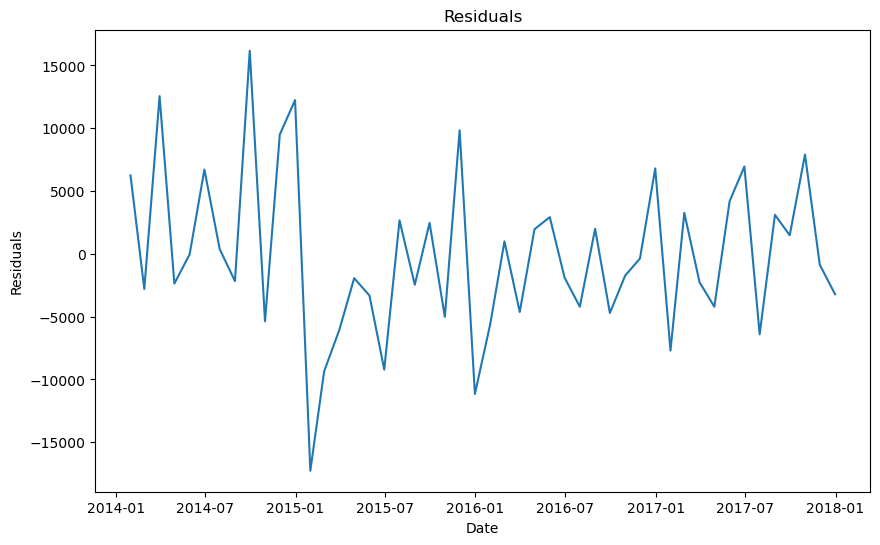

count       48.000000
mean      -125.287795
std       6563.612082
min     -17263.889770
25%      -4316.332894
50%      -1298.878813
75%       3144.733497
max      16168.009656
dtype: float64


In [38]:
# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(results.resid)
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Check residuals summary statistics
print(results.resid.describe())


## 4. Identify correlated variables

In [8]:
#

## 5. Summary